# Laboratorium 8 - Page Rank


##### Aleksandra Mazur

## Zadanie 1 Prosty ranking wierzchołków

Zaimplementowano prosty model błądzenia przypadkowego po grafie skierowanym:
$$r(u)=d\sum_{\substack{v \in B_u}} \frac{r(v)}{N_v}$$,
gdzie **r(u)** oznacza ranking wierzchołka *u*, parametr *c* jest używany w normalizacji, *$B_u$* jest zbiorem wierzchołków, z których wychodzą krawędzie do wierzchołka *u*, *$F_v$* oznacza zbiór wierzchołków, do których dochodzą krawędzie z wierzchołka *v*, a $N_v = |F_v|$. W zapisie macierzowym: 
$$r = dAr$$,
gdzie **A** jest macierzą adiacencji grafu, w której każdy wiersz *u* jest przeskalowany wyjściowym stopniem wierzchołka *u*.

$$A_{u,v} = \begin{cases}
\frac{1}{N_u}  - \text{jeśli krawędź (u,v) istnieje}\\
0 - \text{w przeciwnym przypadku}\\
 \end{cases}$$

W zadaniach skorzystano z bibliotek:
* ***numpy***
* ***networkx***
* ***matplotlib***
* ***os***

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

Funkcja ***get_strongly_connected_directed_graph*** tworzy silnie skierowany graf spójny o *n* wierzchołkach używając funkcji z biblioteki ***networkx*** i zwraca go.

In [2]:
def get_strongly_connected_directed_graph(n):
    G = nx.gnp_random_graph(n, 0.5, directed=True)
    while not len(list(nx.strongly_connected_components(G))) == 1:
        G = nx.gnp_random_graph(n, 0.5, directed=True)
    return G

Funkcja ***draw_graph*** rysuje graf *G*, przekazany jako argument.

In [3]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    plt.figure(1, figsize=(10, 10))
    
    # draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='yellow')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')
    
    # draw edges
    nx.draw_networkx_edges(G, pos, edgelist = G.edges, width = 1, edge_color='black')
    
    plt.axis('off')
    plt.show()

Poniżej przedstawiono wizualizację wygenerowanego grafu.

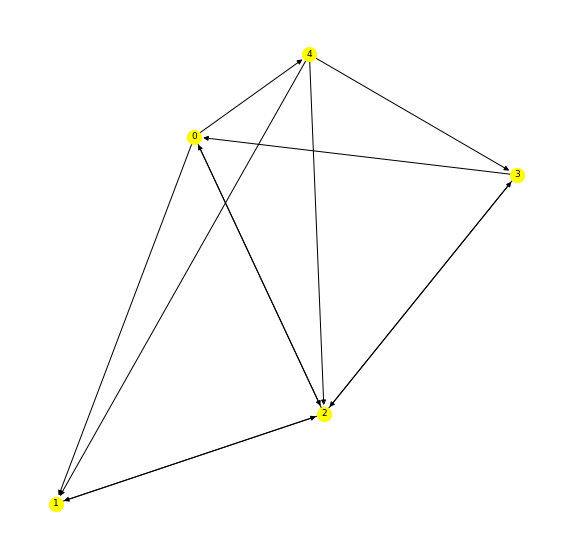

In [4]:
draw_graph(get_strongly_connected_directed_graph(5))

Jak widać powyżej, graf wygenerował się prawidłowo.

Pomocnicza funkcja ***max_abs*** przyjmuje macierz i zwraca największą, bezwzględną wartość występującą w danej macierzy.

In [5]:
def max_abs(matrix):
    return np.amax(abs(matrix))

Funkcja ***transform_matrix_A*** jako argument przyjmuje macierz *A*, która jest macierzą adiacencji grafu i przeskalowuje każdy wiersz wyjściowym stopniem wierzchołka *u*:
$$A_{u,v} = \begin{cases}
\frac{1}{N_u}  - \text{jeśli krawędź (u,v) istnieje}\\
0 - \text{w przeciwnym przypadku}\\
 \end{cases}$$

In [6]:
def transform_matrix_A(A):
    size = len(A)
    
    # liczba niezerowych wartości dla każdego wiersza macierzy A
    N = np.count_nonzero(A, axis=1)

    for u in range(size):
        for v in range(size):
            if A[u, v] != 0:
                A[u, v] = 1 / N[u]
    return A

Funkcja ***power_method*** przyjmuje trzy argumenty: macierz *matrix*, dokładność obliczeń *eps* i maksymalną liczbę iteracji *max_iterations*. Używając metody potęgowej oblicza i zwraca wartość własną i odpowiadający jej wektor własny danej macierzy.

In [17]:
def power_method(matrix, eps = 1e-8, max_iterations = 1000):
    A = np.ones((matrix.shape[0], 1))
    B = np.random.rand(matrix.shape[0], 1)
    
    i = 0
    while i < max_iterations:
        if np.linalg.norm(B - A, ord=1) < eps:
            return max_abs(B), B.T[0], i
        A = B
        B = matrix.dot(A)
        B /= np.linalg.norm(B, ord=1) #  normalize
        i += 1
    
    eigenvalue = max_abs(A)
    A = A / np.linalg.norm(A, ord=1)
    eigenvector = A.T[0]
    return eigenvalue, eigenvector, i

Funkcja ***test*** tworzy graf o rozmiarze *n* i rysuje go. Następnie używając funkcji *to_numpy_matrix* z biblioteki ***networkx*** zamienia utworzony graf na macierz, przeskalowuje tą macierz i używa metody potęgowej.

In [18]:
def test(n):
    print("Size = ", n)
    G = get_strongly_connected_directed_graph(n)
    draw_graph(G)
    M = nx.to_numpy_matrix(G)
    A = transform_matrix_A(M)
    eigenvalue, eigenvector, i = power_method(A)
    print("Eigenvalue = ", eigenvalue)
    print("Eigenvector:")
    print(eigenvector)
    print("Number of iterations: ", i)
    print("")

Size =  20


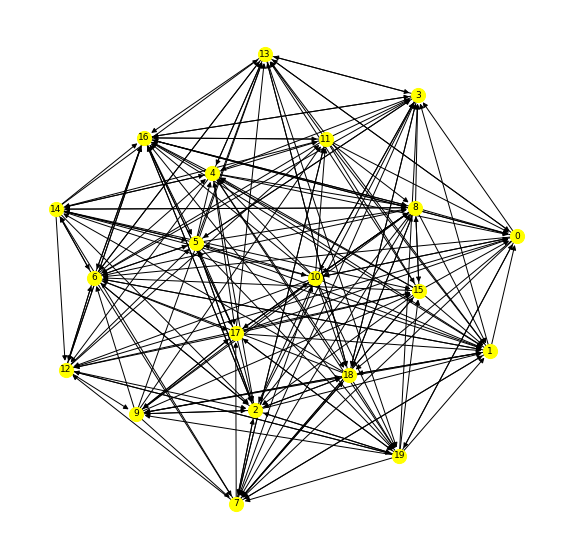

Eigenvalue =  0.05000000015797316
Eigenvector:
[[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
  0.05 0.05 0.05 0.05 0.05 0.05]]
Number of iterations:  14

Size =  35


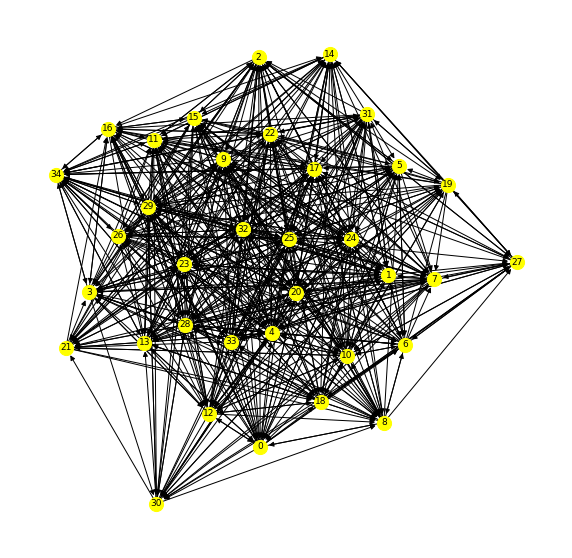

Eigenvalue =  0.028571428610120787
Eigenvector:
[[0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
  0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
  0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
  0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
  0.02857143 0.02857143 0.02857143 0.02857143 0.02857143 0.02857143
  0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]]
Number of iterations:  12

Size =  50


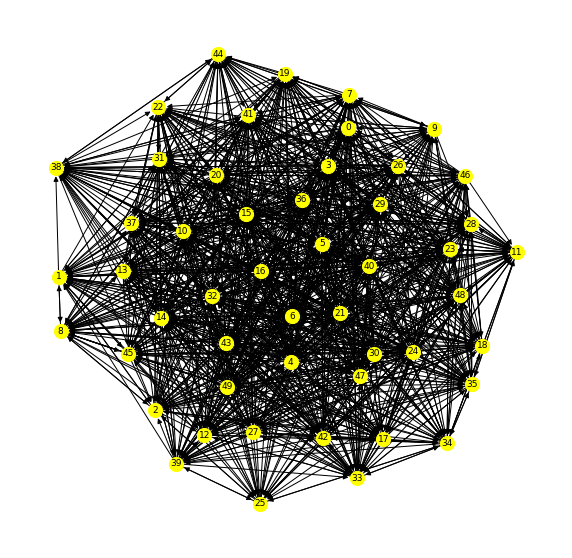

Eigenvalue =  0.02000000002100397
Eigenvector:
[[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
  0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]]
Number of iterations:  11



In [20]:
for n in [20, 35, 50]:
    test(n)

### Wnioski:
* powyższy algorytm wykonuje kilkanaście operacji
* w każdym przypadku wartości otrzymanego wektora własnego sumują się do 1 lub do liczby bliskiej 1
* liczba operacji potrzebnych do wykonania algorytmu nieznacznie maleje wraz ze zwiększaniem rozmiaru grafu
* model błądzenia przypadkowego ma szerokie zastosowanie m.in. w genetyce, ekonomii, fizyce czy psychologii

## Zadanie 2 Page Rank

Rozszerzono model z poprzedniego zadania, dodając możliwość skoku do losowego wierzchołka grafu:
$$r(u)=d\sum_{\substack{v \in B_u}} \frac{r(v)}{N_v} + (1-d) e(u)$$
W zapisie macierzowym:
$$r = (dA + (1-d)e \circ 1)r$$,
gdzie $||r||_1 = 1$, a *e* jest wektorem zawierającym prawdopodobieństwa odwiedzania wierzchołków przez losowy skok.

Wykorzystano metodę potęgową do obliczenia Page Rank jako dominującego wektora własnego macierzy 
$$B = dA + (1-d) e\circ 1$$

1. $r_0$
2. do
3. $r_{i+1} = Br_i$
4. $d = ||r_i||_1 - ||r_{i+1}||_1$
5. $r_{i+1} = r_{i+1} + de$
6. $\delta = ||r_{i+1} - r_i||_1$
7. while $\delta > \epsilon$

Funkcja ***page_rank*** przyjmuje jako argumenty graf *G*, wartość parametru *d*, wektor prawdopodobieństw odwiedzania wierzchołków przez losowy skok *e*, liczbę wierzchołków grafu *n*, maksymalną liczbę iteracji *max_iterations* i dokładność obliczeń *eps*. W pierwszej kolejności przekształca graf na macierz, używając biblioteki *networkx*, a następnie stosuje przedstawiony wyżej algorytm i zwraca page rank oraz liczbę wykonywanych iteracji.

In [10]:
def page_rank(G, d, e, n, max_iterations=1000, eps=1e-8):
    # convert graph to matrix
    A = nx.to_numpy_matrix(G)
    A = transform_matrix_A(A)
    
    B = d * A + (1-d) * e * np.identity(n)
    r_0 = np.ones((n, 1))
    r_1 = np.random.rand(n, 1)
    
    i = 0
    sigma = np.linalg.norm(r_1 - r_0, ord=1)
    
    while i < max_iterations and sigma > eps:
        r_0 = r_1
        r_1 = B.dot(r_1)
        d = np.linalg.norm(r_0, ord=1) - np.linalg.norm(r_1, ord=1)
        r_1 = r_1 + d * e
        sigma = np.linalg.norm(r_1 - r_0, ord=1)
        i += 1
    
    if i == max_iterations:
        print("Max number of iterations reached")
    
    return r_1 / np.linalg.norm(r_1, ord=1), i

Funkcja ***test_page_rank*** przyjmuje jako argumenty graf *G*, liczbę wierzchołków grafu *n*, wartość parametru *d*, nazwę pliku *filename* z zawartością grafu i dokładność obliczeń. Dla różnych wartości prawdopodobieństw odwiedzania wierzchołków przez losowy skok (wartość *e*), wywołuje powyższy algorytm ***page_rank*** i wypisuje uzyskane rezultaty.

In [11]:
def test_page_rank(G, n, d, filename, eps=1e-8):
    for i in range(2):
        e = np.random.rand(n, 1)
        e /= np.linalg.norm(e, ord=1)
        r, iterations = page_rank(G, d, e, n)
        print(filename, ", d: ", d, ",number of iterations: ", iterations, ",sum of vector: ", sum(r))        
        print(r)
    print("")

Funkcja ***show_results*** wczytuje listę plików, które znajdują się w folderze *graphs* i tworzy na ich podstawie grafy. Następnie dla każdego grafu i różnych wartości parametru *d*, wywołuje powyższą funkcję ***test_page_rank***.

In [12]:
def show_results():
    files = os.listdir('graphs/')
    for filename in files:
        G = nx.read_edgelist('graphs/' + filename)
        n = len(G.nodes())
        for d in [0.9, 0.85, 0.75, 0.6, 0.5]:
            test_page_rank(G, n, d, filename)
        print("")

In [13]:
show_results()

p2p-Gnutella08.txt , d:  0.9 ,number of iterations:  165 ,sum of vector:  [[1.]]
[[0.00016623]
 [0.00015258]
 [0.00017189]
 ...
 [0.00015808]
 [0.00013486]
 [0.00014979]]
p2p-Gnutella08.txt , d:  0.9 ,number of iterations:  182 ,sum of vector:  [[1.]]
[[0.00014929]
 [0.00015476]
 [0.00015471]
 ...
 [0.00012848]
 [0.00012903]
 [0.00012555]]

p2p-Gnutella08.txt , d:  0.85 ,number of iterations:  99 ,sum of vector:  [[1.]]
[[0.00013519]
 [0.00011928]
 [0.00016504]
 ...
 [0.00014658]
 [0.00014776]
 [0.0001498 ]]
p2p-Gnutella08.txt , d:  0.85 ,number of iterations:  114 ,sum of vector:  [[1.]]
[[0.0001742 ]
 [0.0001926 ]
 [0.00019055]
 ...
 [0.00017669]
 [0.00019402]
 [0.00017234]]

p2p-Gnutella08.txt , d:  0.75 ,number of iterations:  67 ,sum of vector:  [[1.]]
[[0.00021563]
 [0.0001755 ]
 [0.0001742 ]
 ...
 [0.0001885 ]
 [0.00019814]
 [0.00023746]]
p2p-Gnutella08.txt , d:  0.75 ,number of iterations:  67 ,sum of vector:  [[1.]]
[[1.94007277e-04]
 [1.94007568e-04]
 [1.61111037e-04]
 ...
 [

Grafy:
* p2p-Gnutella08
    - 6 301 wierzchołków
    - 20 777 krawędzi
* p2p-Gnutella09
    - 8 114 wierzchołków
    - 25 013 krawędzi

### Wnioski:
* suma wartości w każdej macierzy zwracanej przez funkcję ***page_rank*** jest równa 1
* algorytm potrzebuje do wykonania od kilkudziesięciu do kilkuset operacji
* największa liczba iteracji przypada na d = 0.9, a najmniejsza na d = 0.5
* liczba iteracji potrzebnych do uzyskania wyniku maleje wraz ze zmniejszaniem parametru *d* dla każdego grafu
* graf o większej liczbie wierzchołków i krawędzi potrzebuje większej liczby operacji
* liczba operacji dla danego grafu i danej wartości parametru *d* różni się nieznacznie lub wcale dla różnych wartości prawdopodobieństw odwiedzania wierzchołków przez losowy skok (wartość *e*)

## Podsumowanie:
* głównym zastosowaniem Page Rank jest wyszukiwanie
* najbardziej popularną wyszukiwarką stosującą Page Rank jest wyszukiwarka *Google*
* Page Rank jest używany przez *Twitter* do prezentowania użytkownikowi innych kont, które chciałby obserwować
* Page Rank jest regularnie wykorzystywany w:
    - analizie linków społecznościowych
    - przewidywaniu linków i rekomendacji
    - analizie systemów sieci drogowych
    - biologii
    - chemii
    - fizyce

Problemy, jakie można napotkać próbując wykorzystać powyższe metody dla bardzo dużych grafów ($10^9$ wierzchołków):
* duży czas działania programów
* niewystarczająca ilość pamięci